In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, wilcoxon, shapiro, levene, f_oneway, mannwhitneyu
from statsmodels.stats.power import ttest_power
import scipy.stats as stats

In [16]:
D=[43,45,45,47]
E=[37,40,40,43]
F=[34,35,35,36]

In [7]:
D_bar=np.mean(D)
E_bar=np.mean(E)
F_bar=np.mean(F)
D_var=np.var(D)
E_var=np.var(E)
F_var=np.var(F)

xbar_total= (np.sum(D)+np.sum(E)+np.sum(F))/12


In [9]:
# Between sample variability(MSTR)

SSTR= (len(D)*(D_bar-xbar_total)**2)+(len(E)*(E_bar-xbar_total)**2)+(len(F)*(F_bar-xbar_total)**2)
df1=3-1
MSTR=SSTR/df1
MSTR

100.0

In [10]:
#within sample variability, MSE= SSE/dof
SSE=(len(D)-1)*D_var + (len(E)-1)*E_var+ (len(F)-1)*F_var
df2=12-3
MSE=SSE/df2
MSE

2.3333333333333335

In [24]:
f_val=MSTR/MSE
f_val

42.857142857142854

In [12]:
D_bar, D_var


(45.0, 2.0)

In [13]:
E_bar, E_var

(40.0, 4.5)

In [14]:
F_bar, F_var

(35.0, 0.5)

In [ ]:
# here we have a high F value, which means that the mstr value(between sample variability) will be high

In [18]:
A=[30,40,50,60]
B=[25,30,50,55]
C=[25,30,40,45]

In [19]:
A_bar=np.mean(A)
B_bar=np.mean(B)
C_bar=np.mean(C)
A_var=np.var(A)
B_var=np.var(B)
C_var=np.var(C)

xbar_total= (np.sum(A)+np.sum(B)+np.sum(C))/12

In [20]:
# Between sample variability(MSTR)

SSTR1= (len(A)*(A_bar-xbar_total)**2)+(len(B)*(B_bar-xbar_total)**2)+(len(C)*(C_bar-xbar_total)**2)
d1=3-1
MSTR1=SSTR1/d1
MSTR1

100.0

In [35]:
#within sample variability, MSE= SSE/dof
SSE1=(len(A)-1)*A_var + (len(B)-1)*B_var+ (len(C)-1)*C_var
d2=12-3
MSE1=SSE1/d2
MSE1

116.66666666666667

In [36]:
f_val1=MSTR1/MSE1
f_val1

0.8571428571428571

In [28]:
f1,p1= f_oneway(A,B,C)
print(f1,p1)

0.6428571428571429 0.5483227164089495


In [29]:
f2,p2=f_oneway(D,E,F)

In [30]:
f2, p2

(32.14285714285714, 7.970844367886858e-05)

With the evidence of p value, group A, B ,C(Fails to reject Ho) values are more stable than D,E, F(rejects Ho) as the values of 
A, B, C group vary more and are not biased to their mean, so it is easier to manipulate values in group A,B,C without any change
being made in their means.

In [37]:
pwd C:\Users\ASUS\Desktop\great learning\week3

'C:\\Users\\ASUS\\Desktop\\great learning\\week3'

In [38]:
A=pd.read_table('HR.txt', index_col=0)

#### Q. Check if there is any significant difference in mean salary in HR data wrt to employee education?

In [39]:
A.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


In [43]:
B=pd.crosstab(A['MonthlyIncome'], A['Education']) #contingency table
B

Education,1,2,3,4,5
MonthlyIncome,,,,,
1009,1,0,0,0,0
1051,0,1,0,0,0
1052,1,0,0,0,0
1081,0,0,1,0,0
1091,0,0,1,0,0
1102,0,0,1,0,0
1118,1,0,0,0,0
1129,1,0,0,0,0
1200,0,0,1,0,0


In [44]:
A["Education"].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [52]:
df_edu= A.groupby("Education")
g1=df_edu.get_group(1)
g2=df_edu.get_group(2)
g3=df_edu.get_group(3)
g4=df_edu.get_group(4)
g5=df_edu.get_group(5)

s1=g1['MonthlyIncome']
s2=g2['MonthlyIncome']
s3=g3['MonthlyIncome']
s4=g4['MonthlyIncome']
s5=g5['MonthlyIncome']


In [53]:
f_oneway(s1,s2,s3,s4,s5)

F_onewayResult(statistic=3.8929774134094077, pvalue=0.003768508926919263)

1         AxesSubplot(0.1,0.679412;0.363636x0.220588)
2    AxesSubplot(0.536364,0.679412;0.363636x0.220588)
3         AxesSubplot(0.1,0.414706;0.363636x0.220588)
4    AxesSubplot(0.536364,0.414706;0.363636x0.220588)
5             AxesSubplot(0.1,0.15;0.363636x0.220588)
dtype: object

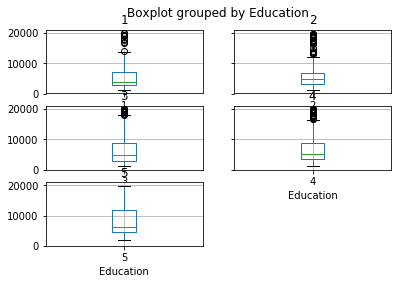

In [58]:
df_edu.boxplot(column='MonthlyIncome', by= 'Education')

we reject the null hyp, there is asignificant difference between salaries of people with different education

Ho: mean salary(hourly)=  mean salary(Salaried)= mean salary(monthly) 

In [61]:
F=pd.read_csv('fair_pay_data.csv', index_col=0)

In [60]:
F.head()

,department,salary,new_hire,job_level
employee_id,,,,
1,Sales,103263.63550,No,Salaried
2,Engineering,80708.64104,No,Hourly
4,Engineering,60737.04786,Yes,Hourly
5,Engineering,99116.32328,Yes,Salaried
7,Engineering,51021.64386,No,Hourly


In [71]:
fjoblevel=F.groupby("job_level")


In [72]:
F["department"].value_counts()

Engineering    961
Sales          446
Finance         63
Name: department, dtype: int64

In [73]:
F["job_level"].value_counts()

Hourly      1039
Salaried     326
Manager      105
Name: job_level, dtype: int64

In [76]:
x1= fjoblevel.get_group("Salaried")
x2= fjoblevel.get_group("Hourly")
x3= fjoblevel.get_group("Manager")

In [79]:
a1=x1['salary']
a2=x2['salary']
a3=x3['salary']

In [81]:
fval,pval=f_oneway(a1,a2,a3)
fval, pval

(2564.3512004718987, 0.0)

In [82]:
shapiro(a1)

(0.9546260237693787, 1.6897491406098197e-08)

In [89]:
mannwhitneyu(a1,a2)

MannwhitneyuResult(statistic=169.0, pvalue=9.044609362547591e-164)

In [83]:
shapiro(a2)

(0.9713829159736633, 1.9065220864707133e-13)

In [85]:
shapiro(a3)

(0.9276042580604553, 2.3740658434689976e-05)

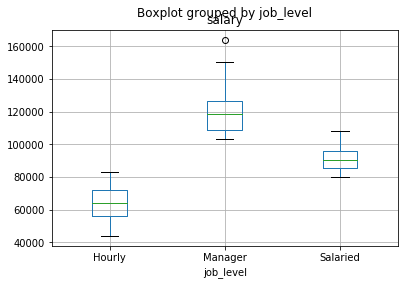

In [90]:
F.boxplot(column='salary', by= 'job_level')

In [94]:
delta1=(np.mean(a1) - np.mean(a2)) / np.sqrt(((326-1)*np.var(a1)+(1039-1)*np.var(a2)) / 1039+326-2)
delta1

2.6999240287660022

In [97]:
pot=ttest_power(delta1, nobs=1039+326, alpha=0.05, alternative='two-sided')
pot

1.0

In [77]:
fdeptt=F.groupby("department")

In [78]:
y1= fdeptt.get_group("Engineering")
y2= fdeptt.get_group("Sales")
y3= fdeptt.get_group("Finance")

In [91]:
b1=y1['salary']
b2=y2['salary']
b3=y3['salary']

In [93]:
fval1, pval1=f_oneway(b1,b2,b3)
fval1, pval1

(1.5095348803367656, 0.22135584696393226)